# AltSchool of Data Science Tinyuka 2024 Second Semester Project Assessment

#1. This is how I will deal with missing data using the house_prices.csv dataset given as an assignment my AltSchool DataScience Tutor.

In [ ]:
# importing our reqired libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# loading in our dataset

# mounting google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

file_name = '/content/drive/MyDrive/Altschool/house_prices.csv'

my_df = pd.read_csv(file_name)

Mounted at /content/drive


In [ ]:
my_df.info()
my_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
#Identifying Columns with Missing Values
missing_cols = my_df.columns[my_df.isnull().any()]
my_df[missing_cols].isnull().sum()

,0
location,1
size,16
society,5502
bath,73
balcony,609


# Categorizing Each Column as MCAR, MAR, or MNAR

location	1	, MCAR	Only one missing value in a key field. likely a random omission or data entry error. No pattern expected.

size	16	, MAR	Size could be missing in rows where other features (like society or bath) are available. Likely related to other observable factors.

society	5502, MNAR	Massive number of missing values may suggest deliberate omission. perhaps because many houses are not in a society or it was intentionally left blank for privacy. The missingness depends on the value itself.

bath	73, 	MAR	Number of bathrooms might correlate with size or number of bedrooms. Missingness is probably dependent on other observed variables.

balcony	609	MNAR	Could be missing because a house has no balcony (i.e., missingness depends on the actual value being 0 or none). Suggests Not at Random.




#2. This is how I will Aggregate and Group data

In [ ]:
#Loading in my us-counties-2020.csv data set

file_name = '/content/drive/MyDrive/Altschool/us-counties-2020.csv'

my_df2 = pd.read_csv(file_name)

my_df2.info()
my_df2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884737 entries, 0 to 884736
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    884737 non-null  object 
 1   county  884737 non-null  object 
 2   state   884737 non-null  object 
 3   fips    876471 non-null  float64
 4   cases   884737 non-null  int64  
 5   deaths  865976 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 40.5+ MB


,0
date,0
county,0
state,0
fips,8266
cases,0
deaths,18761


In [ ]:
# This is my summary of the average number of COVID cases by state
## Calculate average COVID cases by state
avg_cases = my_df2.groupby('state')['cases'].mean().reset_index()

full_avg_cases_sorted = avg_cases.sort_values(by='cases', ascending=False)

full_avg_cases_sorted

,state,cases
8,District of Columbia,12148.736667
2,Arizona,10717.680837
4,California,10414.212011
31,New Jersey,8884.585358
22,Massachusetts,8420.184743
33,New York,7514.747620
9,Florida,7083.964150
6,Connecticut,6598.018781
7,Delaware,4525.352941
42,Rhode Island,4287.308275


#Summary of Average COVID-19 Cases by State

##Highest Average Cases:
The top 5 states (or territories) with the highest average number of COVID-19 cases are:

District of Columbia – 12,148.74

Arizona – 10,717.68

California – 10,414.21

New Jersey – 8,884.59

Massachusetts – 8,420.18

These states tend to have densely populated urban centers, which may have contributed to higher transmission rates.

##Lowest Average Cases:
The bottom 5 regions with the lowest average number of COVID-19 cases are:

Northern Mariana Islands – 31.74

Vermont – 130.84

Virgin Islands – 229.87

West Virginia – 315.33

Maine – 325.52

These regions are relatively rural or geographically isolated, which may have helped reduce spread and exposure.

##Notable Observations:
Urban and coastal states like California, New York, and Florida reported relatively high average case counts.

Smaller, more remote areas such as the Northern Mariana Islands and Vermont showed significantly lower averages, possibly due to lower population density, stricter entry controls, or fewer testing/reporting events.

Some mainland states like Texas and Georgia reported lower average cases than expected, which may indicate variations in testing strategies, reporting accuracy, or public health interventions.

#This is how I will analyze the time series

In [ ]:
# To convert date column to Datetime

my_df2['date'] = pd.to_datetime(my_df2['date'])

# To set date column as index
my_df2.set_index('date', inplace=True)

In [ ]:
# To Filter One State and Resample

state_df = my_df2[my_df2['state'] == 'Vermont']

monthly_cases = state_df['cases'].resample('ME').sum()

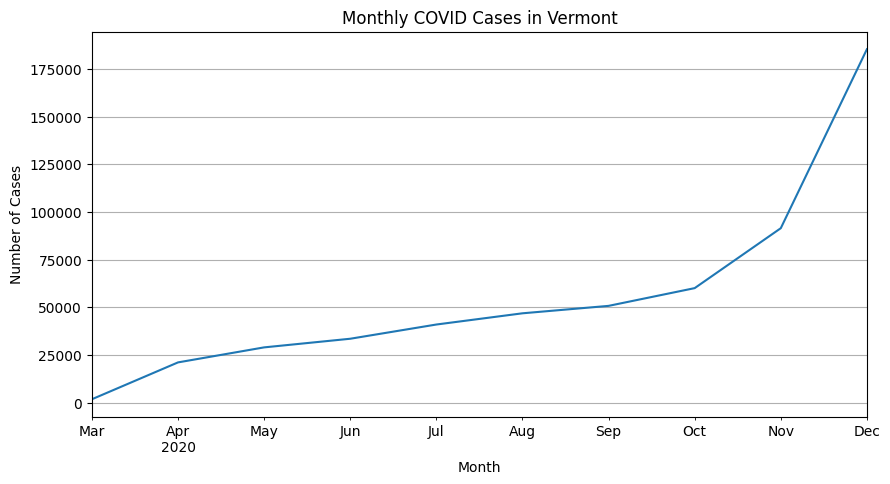

In [ ]:
#To Visualise the data

import matplotlib.pyplot as plt

monthly_cases.plot(figsize=(10,5), title='Monthly COVID Cases in Vermont')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

##Spikes or Drops:

Steady Increase (March - October 2020): From March 2020 to approximately October 2020, there was a relatively steady, gradual increase in the number of COVID cases. The curve shows a consistent upward trend during this period.

Significant Spike (October - December 2020): A very significant spike in COVID cases is evident from October 2020 through December 2020. The curve becomes much steeper, indicating a rapid acceleration in the number of reported cases. The number of cases appears to more than double in this two-month period, going from roughly 60,000 in October to over 175,000 in December.


There are no notable drops in the data shown; the trend is consistently increasing throughout the displayed period.